In [1]:
import dallinger
import matplotlib.pyplot as plt
import numpy as np

import preprocess

/srv/conda/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


# Data structure

In [3]:
data = dallinger.data.load("85da95bb-a015-6176-8ee4-5935fc98fbcb")

Available tables include:

```
data.infos            # Information generated by nodes
data.networks         # Nodes and vectors between them
data.nodes            # Nodes in the network, one per agent
data.notifications    # Notifications from recruiters about participants
data.participants     # Participants recruited for the experiment
data.questions        # Questionnaire items asked of participants
data.transformations  # Transformations of one info into another
data.transmissions    # Transmissions of infos from one node to another
data.vectors          # Links between nodes
```

And each table can be accessed, e.g., in these formats:

```
data.networks.csv    # Comma-separated value
data.networks.dict   # Python dictionary
data.networks.df     # pandas DataFrame
data.networks.html   # HTML table
data.networks.latex  # LaTeX table
data.networks.list   # Python list
data.networks.ods    # OpenDocument Spreadsheet
data.networks.tsv    # Tab-separated values
data.networks.xls    # Legacy Excel spreadsheet
data.networks.xlsx   # Modern Excel spreadsheet
data.networks.yaml   # YAML
```

# Basic analyses
Below are some basic analyses of the pilot data.

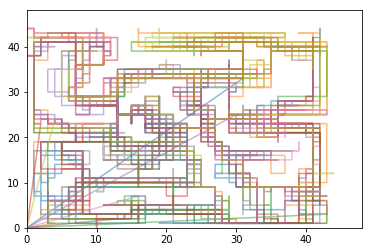

In [6]:
# Plot players positions over time.
(times, positions_x, positions_y) = preprocess.timecourse_player_positions(data)
plt.xlim([0, 48])
plt.ylim([0, 48])
for i in range(positions_x.shape[1]):
    plt.plot(positions_x[:, i], positions_y[:, i], alpha=0.50)
plt.show()

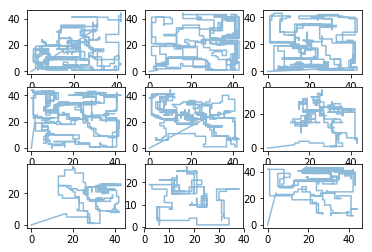

In [9]:
(times, positions_x, positions_y) = preprocess.timecourse_player_positions(data)
plt.xlim([0, 48])
plt.ylim([0, 48])
plt.axis("off")

for i in range(positions_x.shape[1]):
    plt.subplot(3, 3, i+1)
    plt.plot(positions_x[:, i], positions_y[:, i], alpha=0.50)
plt.show()

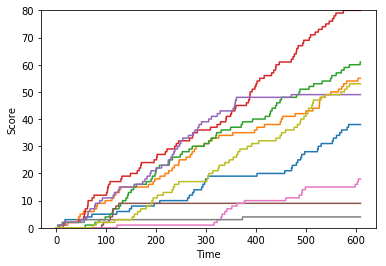

In [8]:
# Plot score per player over time.
(t, s) = preprocess.timecourse_player_scores(data)
plt.ylim([0, np.max(s)])
plt.xlabel("Time")
plt.ylabel("Score")
for column in s.T:
    plt.plot(t, column)
plt.show()

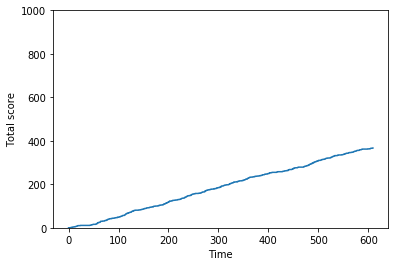

In [10]:
(t, s) = preprocess.timecourse_player_scores(data)
plt.ylim([0, 1000])
plt.xlabel("Time")
plt.ylabel("Total score")
plt.plot(t, np.sum(s, axis=1))
plt.show()

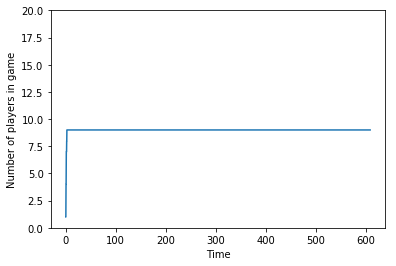

In [11]:
(t, n) = preprocess.timecourse_num_players(data)
plt.ylim([0, 20])
plt.xlabel("Time")
plt.ylabel("Number of players in game")
plt.plot(t, n)
plt.show()